# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Lista 1 (Data de Entrega: 11/10/2022)

## Prof. Luis Gustavo Nonato
## Monitor: Bruno da Freiria Mischiati Borges  

ICMC-USP

----

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Questão 1:  (2,5 pontos)
Considerando a equação do calor abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

onde $\kappa=2$. Suponha que o intervalo temporal esteja discretizado de modo que $\Delta t = 0.14$. Qual dos valores abaixo para $\Delta x$ torna o método de diferenças finitas estável?
Implemente um código para encontrar o valor pedido

a) 0.6</font><br>
b) 0.75 (X) <br>
c) 0.70<br>
d) 0.5<br>

In [ ]:
# Solucao 
# Pelo Teorema de Lax sabemos que a razão k*dt/(dx)² <= 1/2 para a equação do Calor, assim
#       para o valor dt = 0.14, temos que 2*0.14/(dx)² <= 0.5
#
#             0.28/0.5 <= dx²
#                  0.56 <= dx²
#                      0.748 <= dx
k = 2.0
dt = 0.14
dx = 0.75
print(k*dt/dx**2)

0.4977777777777778


### Questão 2:  (2,5 pontos)
Considere a função 

$$
f(x)=tan(x)
$$

no intervalo $x\in[0.2,0.6]$.

Aproxime a função no ponto x = 0.4 utilizando o polinômio de Taylor de segundo grau abaixo

$$
f(x_0+h) = f(x_0)+f^{'}(x_0)h + f^{''}(x_0)\frac{h^2}{2}
$$

Qual o valor da aproximação no ponto $x = 0.5$ (considere três casas decimais)?

Imprima, em um só quadro, o gráfico da função $f(x) = tan(x)$ e do polinômio de Taylor obtido. Além disso, mostre graficamente o ponto $x = 0.5$ avaliado no polinômio de Taylor.


a) 0.437<br>
b) 0.643<br>
c) 0.545 (X) <br>
d) 0.449<br>

0.5003003003003003
0.5456523217442257
0.5466924776818608


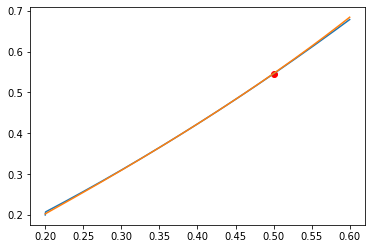

In [ ]:
# Solucao
def myTaylor(x):
  h = x - 0.4
  value =  np.tan(0.4) + h/(np.cos(0.4)**2) + np.sin(0.4)*(h**2)/(np.cos(0.4)**3)
  return value

x = np.linspace(0.2, 0.6, 1000)
u = np.zeros(1000)
v = np.tan(x)
u[0] = 0.2

for i in range(1, 1000):
  u[i] = myTaylor(x[i])
  
print(x[750])
print(myTaylor(0.5))
print(v[750])

plt.plot(x, u)
plt.plot(x, v)
plt.scatter(0.5,myTaylor(0.5),c='r')

#### Questão 3:  (2,5 pontos)
Considere a equação do calor como descrita abaixo:

$$
u_t(x,t)=\kappa u_{xx}(x,t)
$$

Supondo $x\in[0,2\pi]$, $t\in[0,3]$, $\kappa=3$, $\Delta x = 0.7$ e as condições de contorno $u(0,t)=t^3$ e $u(2\pi,t)=sen(t)$ encontre uma aproximação do valor da solução em $u(2,3)$. O valor aproximado é:

a) 6.984 (X) <br>
b) 6.975<br>
c) 6.447<br>
d) 6.450<br>

Faça um gráfico da solução aproximada em $u(x,3)$ e o ponto $u(2,3)$ apontado na solução.

Dica: calcule a solução aproximada em $u(x,3)$ por interplação linear

7.327536390286192
[0.   0.7  1.4  2.1  2.8  3.5  4.2  4.9  5.6  6.28]
[27.   17.41 11.05  6.88  4.19  2.47  1.36  0.6   0.    0.14]


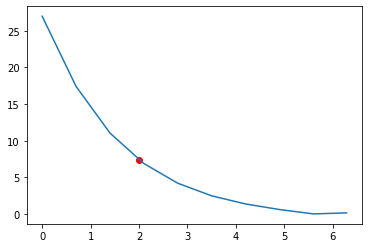

In [ ]:
# Solucao
k = 3.0

dx = 0.7
L = 2*np.pi
nX = int(np.ceil(L/dx))
#x = np.linspace(0, 2*np.pi, nX)

x = np.zeros(nX+1)
for i in range(0, nX+1):
  x[i] = dx*i
x[-1] = 2*np.pi


dt = (dx**2)/(2*k)
T = 3.0
nT = int(np.ceil(T/dt))
t = np.linspace(0, T, nT)
"""t = np.zeros(nT)
for i in range(0, nT):
  t[i] = dt*i
t[-1] = 3.0
"""
u = np.zeros((nX+1, nT))
for q in range(len(t)):
  u[0, q] = t[q]**3
  u[-1, q] = np.sin(t[q])


for i in range(0,nT-1):
    for j in range(1, nX-1):
      u[j, i+1] = u[j, i]+ dt*(k*(u[j-1, i] -2*u[j, i] + u[j+1, i])/(dx**2))

y = u[3, -1] - (2 - x[3])*(u[2, -2] - u[3, -1])/dx

np.set_printoptions(precision=2)

print(y)
print(x)
print(u[:, -1])
plt.plot(x, u[:,-1])
plt.scatter(2,y,c='r')


# Professor, como pode perceber, independente da discretização que faço
#      o valor para o ponto x=2 sempre dá maior do que todos os valores das alternativas


#### Questão 4:  (2,5 pontos)
Considere a função $f(x)=xe^x$.
Faça o gráfico da função $f^{\prime}(x)$ (primeira derivada) e da aproximação de $\hat{f}^{\prime}(x)$ utilizando diferenças finitas centradas no intervalo $[-3,3]$ com $\Delta x=0.1$. Repita o processo para $f^{\prime\prime}(x)$ e $\hat{f}^{\prime\prime}(x)$. O valor dos erros de aproximação (com três casas decimais) $|f^{\prime}(x)-\hat{f}^{\prime}(x)|$ e $|f^{\prime\prime}(x)-\hat{f}^{\prime\prime}(x)|$ no ponto $x=1.5$ são, respectivamente:

a) 0.723 e 0.023<br>
b) 0.756 e 0.022<br>
c) 0.818 e 0.020 (X) <br>
d) 0.812 e 0.023

In [ ]:
# Solucao
def func(x):
  value = x*np.exp(x)
  return value

def funcDer(x):
  value = (x+1)*np.exp(x)
  return value

def funcSecondDer(x):
  value = (x+2)*np.exp(x)
  return value 



dx = 0.1
x = np.zeros(int(6/0.1) + 1)
for i in range(0, len(x)):
  x[i] = -3 + i*0.1

u = np.zeros(len(x))
v = np.zeros(len(x))

for i in range(0, len(u)):
  u[i] = (func(x[i] + dx) - func(x[i]))/dx
  v[i] = (func(x[i] + dx) - 2*func(x[i]) + func(x[i] - dx))/(dx**2)

#print(x)
print(u[-16] - funcDer(1.5))
print(v[-16] - funcSecondDer(1.5))

0.8189600594057094
0.020550413870150663
